# `snow_partitioning_parallel`
Similar to `snow_partitioning` except that it performs SNOW algorithm in parallel and serial mode to save computational time and memory requirement respectively.    

## Import packages

In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np

import porespy as ps

ps.visualization.set_mpl_style()
np.random.seed(10)

D:\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


No module named 'pyedt'


## `im`
Works on 2D and 3D images. We use 2D here because it is easier to visualize.

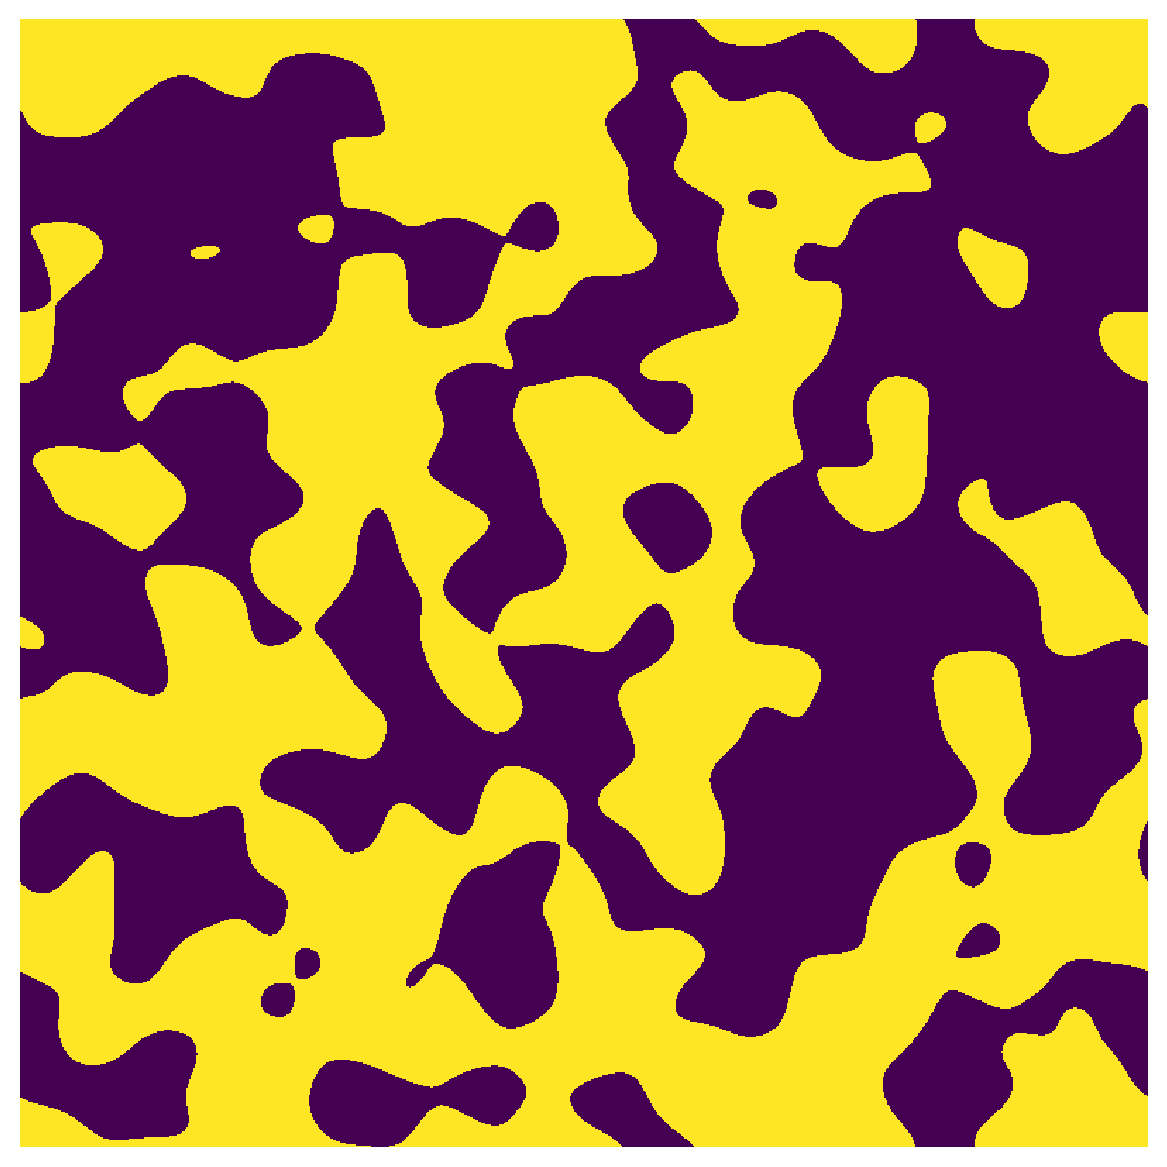

In [2]:
im = ps.generators.blobs(shape=[800, 800])

plt.figure(figsize=[6, 6])
plt.axis(False)
plt.imshow(im);

## `parallel_kw`
The parallel_kw argument takes a dictionary with the following keywords: `overlap`, `divs`, and `cores`. First, the user supplied or default `parallel_kw` dictionary will be checked for available instruction on how to perform parallelization. If not provided, the settings in `porespy.settings` will be used to set parllelization arguments!

## `overlap`, `divs`, and `cores`
 `cores` is the number of cores to use. The more cores the faster the `snow_partitioning` performs. If `overlap` is None it is estimated using `porespy.tools.estimate_overlap` method. The domain is divided by 2 in each direction as supplied to `divs`.

In [3]:
start = time.time()
parallel_kw = {"divs": 2, "overlap": None, "cores": 1}
x1 = ps.filters.snow_partitioning_parallel(im, r_max=5, sigma=0.4, parallel_kw=parallel_kw)
pause = time.time()
parallel_kw = {"divs": 2, "overlap": None, "cores": 4}
x2 = ps.filters.snow_partitioning_parallel(im, r_max=5, sigma=0.4, parallel_kw=parallel_kw)
stop = time.time()

print('OPERATION TIME:')
print('cores=1:', pause-start, 'seconds')
print('cores=4:', stop-pause, 'seconds')

OPERATION TIME:
cores=1: 2.6554758548736572 seconds
cores=4: 0.12850618362426758 seconds


The snow algorithm returns several images

In [4]:
print(x1)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Results of snow_partitioning_parallel generated at Fri Apr 25 10:38:01 2025
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
im                        Array of size (800, 800)
dt                        Array of size (800, 800)
regions                   Array of size (800, 800)
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


Plot the results

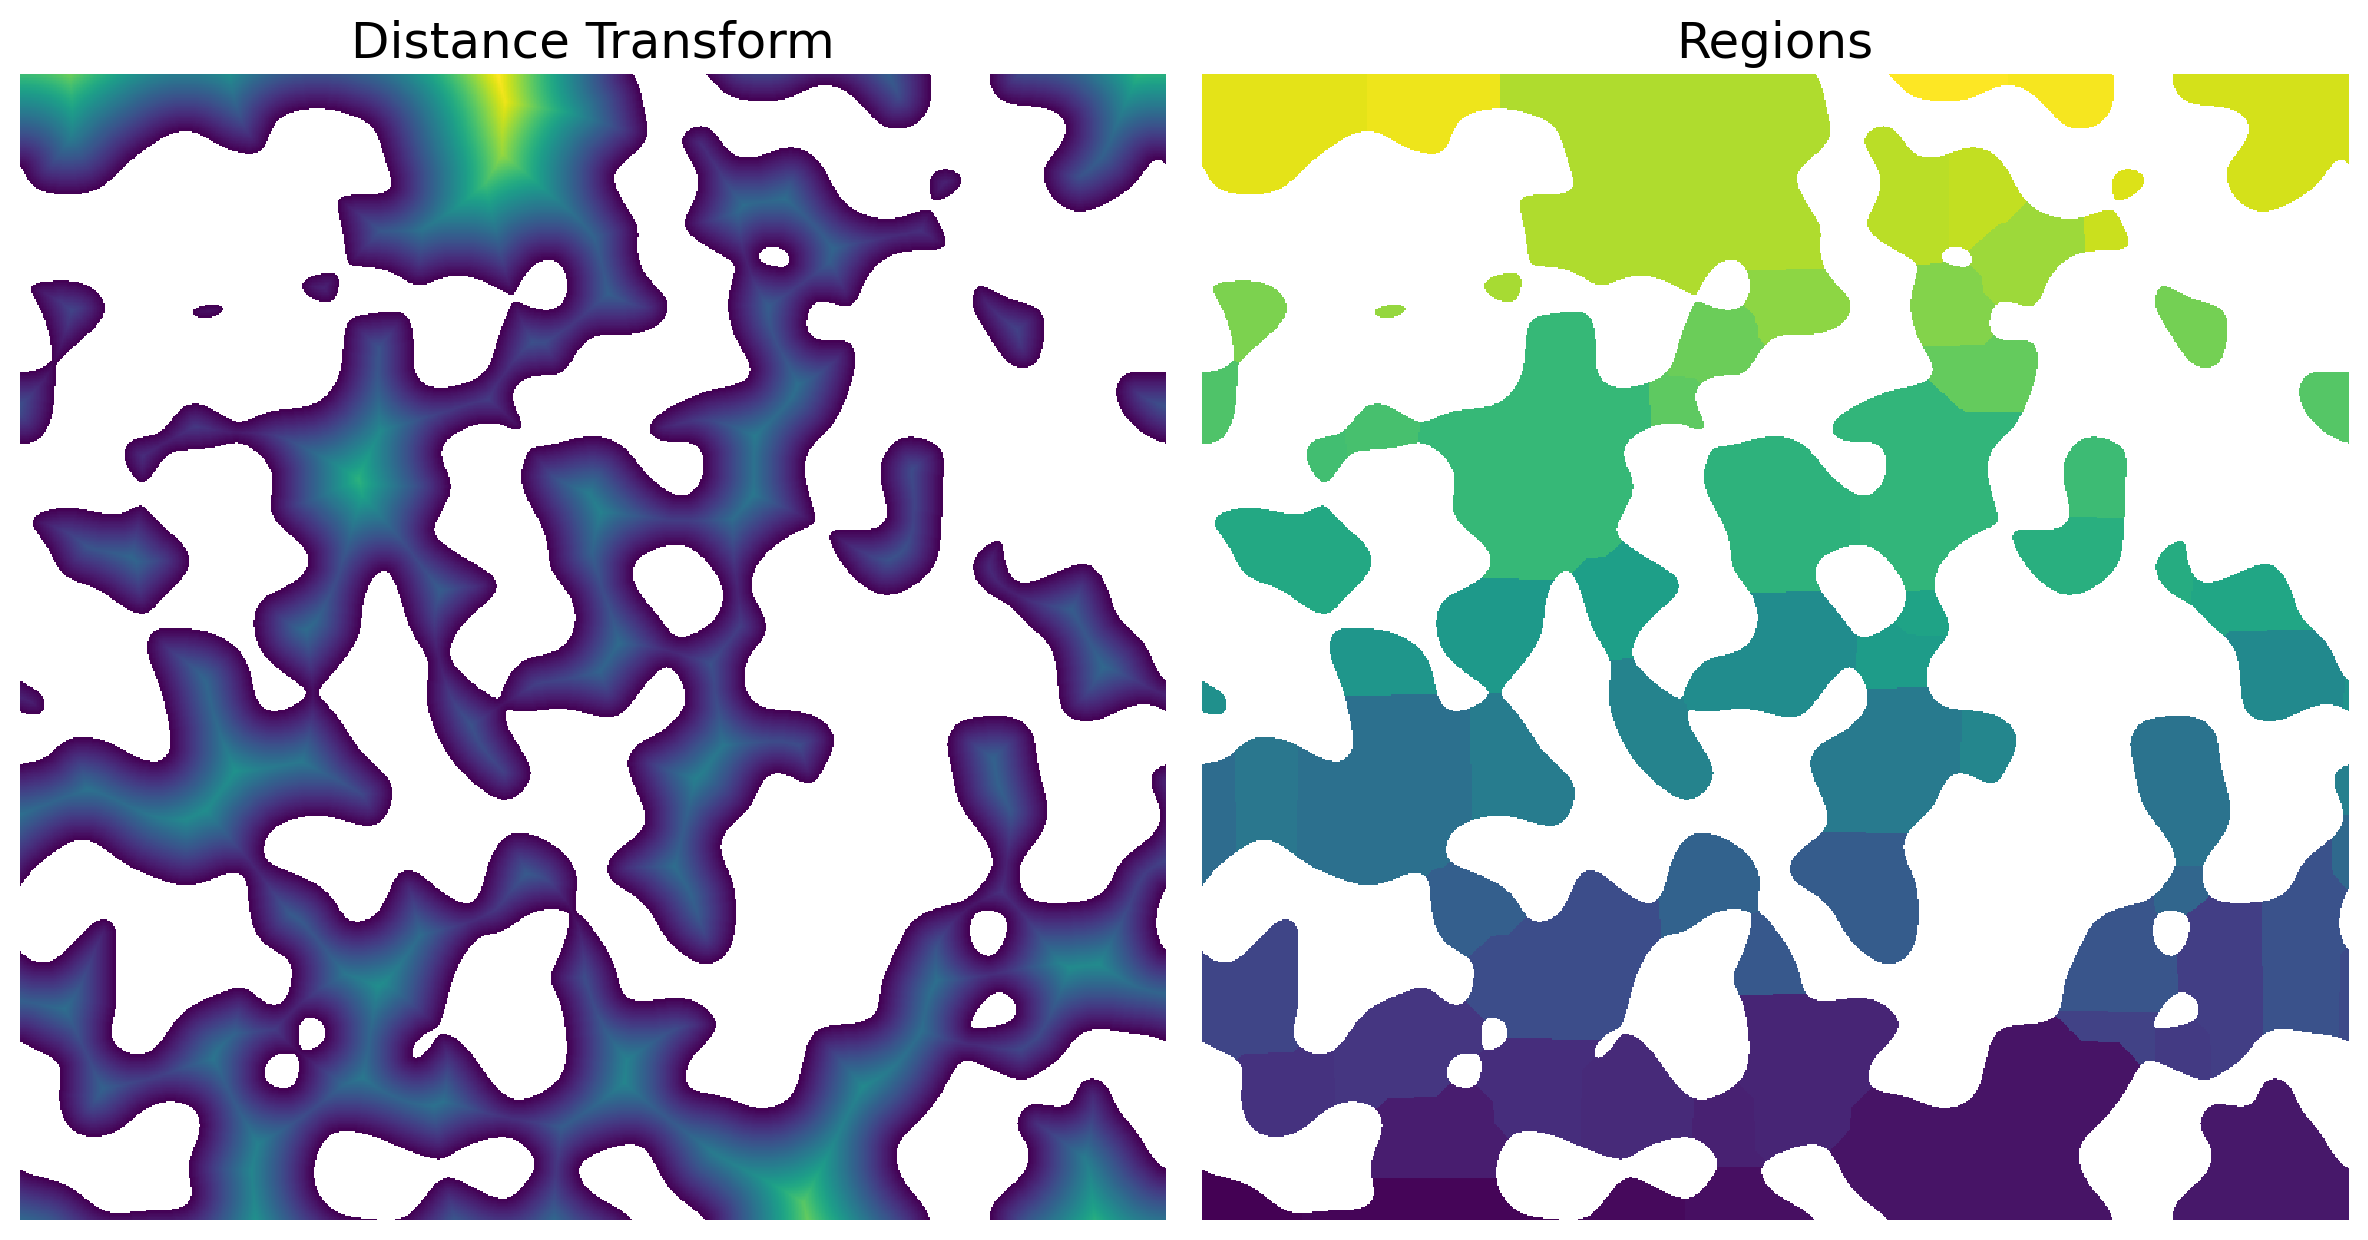

In [5]:
fix, ax = plt.subplots(1, 2, figsize=[12, 12])
ax[0].axis(False)
ax[0].imshow(x1.dt/im)
ax[0].set_title('Distance Transform', fontdict={'fontsize': 18})
ax[1].axis(False)
ax[1].imshow(x1.regions/im)
ax[1].set_title('Regions', fontdict={'fontsize': 18});